# <center>Exploratory Data Analysis - Stop and Searches in England and Wales</center>

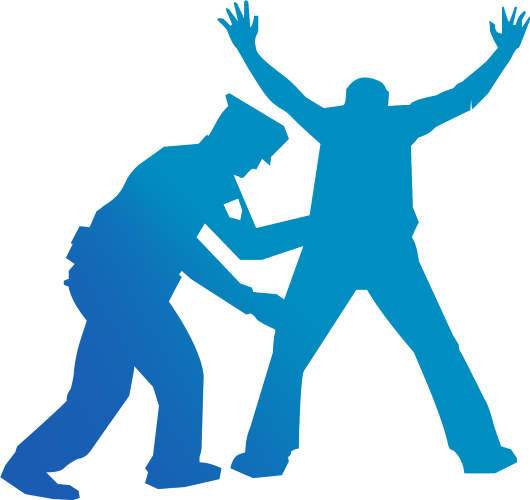

## 1. Introduction

Figures on stop and search reported to the Home Office are used to create greater transparency in England and Wales. The data enhances accountability by enabling the public to monitor police forces at a national and local level.

Someone who is stopped and searched is usually asked for their ethnicity. Stop and searches are not spread evenly across England and Wales. National rates are influenced by the higher number of stop and searches involving certain ethnic groups and the differences in populations in certain police force areas. The data was downloaded from [data.gov.uk](https://data.gov.uk/).

NOTE: Stop and search figures for Greater Manchester Police are not included, because they were unable to provide complete data for the most recent year.

## 2. Data Cleaning 

In [1]:
# import the libraries required for this project
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#silence warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
stop_n_search = pd.read_csv('stop-and-search-data.csv')

In [3]:
stop_n_search.head(2)

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Legislation_type,Geography,Geography_type,Number of stop and searches,Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported),Population by ethnicity,"Rate per 1,000 population by ethnicity",Proportion of total stop and searches of this ethnicity in the financial year (excludes unreported),Unnamed: 13
0,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,All,All - excluding BTP,Police Force Area,"1,037,735","932,065","56,075,912",18.51,NaN,NaN
1,Number of stops and searches carried out (excl...,2007/08,Financial year,All,All,All,All - excluding BTP,Police Force Area,"1,214,693","1,125,647","56,075,912",21.66,NaN,NaN


In [4]:
# find out how many unique values there are in each column
# can also use stop_n_search with the .nunique() method
for c in stop_n_search.columns:
    print(c)
    print(len(stop_n_search[c].unique()))
    print('-' * 20)
    print('\n')

Measure
1
--------------------


Time
14
--------------------


Time_type
1
--------------------


Ethnicity
26
--------------------


Ethnicity_type
5
--------------------


Legislation_type
4
--------------------


Geography
48
--------------------


Geography_type
1
--------------------


Number of stop and searches
4453
--------------------


Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported)
664
--------------------


Population by ethnicity
2034
--------------------


Rate per 1,000 population by ethnicity
4351
--------------------


Proportion of total stop and searches of this ethnicity in the financial year (excludes unreported)
707
--------------------


Unnamed: 13
1
--------------------




In [5]:
# drop 'measure', 'time_type', 'geography_type', 'Unnamed: 13' columns because they only have ONE unique value
stop_n_search.drop(columns=['Measure', 'Time_type', 'Geography_type', 'Unnamed: 13'], inplace=True)

In [6]:
# investigate the data type of each column
stop_n_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 10 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Time                                                                                                                        16443 non-null  object 
 1   Ethnicity                                                                                                                   16443 non-null  object 
 2   Ethnicity_type                                                                                                              16443 non-null  object 
 3   Legislation_type                                                                                                         

In [7]:
stop_n_search.iloc[:5, 5:]

,Number of stop and searches,Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported),Population by ethnicity,"Rate per 1,000 population by ethnicity",Proportion of total stop and searches of this ethnicity in the financial year (excludes unreported)
0,"1,037,735","932,065","56,075,912",18.51,NaN
1,"1,214,693","1,125,647","56,075,912",21.66,NaN
2,"1,495,379","1,409,802","56,075,912",26.67,NaN
3,"1,345,334","1,284,197","56,075,912",23.99,NaN
4,"1,169,012","1,284,197","56,075,912",20.85,NaN


In [8]:
# these are columns that need to be cleaned and converted to numerical type
stop_n_search.columns[5:9]

Index(['Number of stop and searches',
       'Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported)',
       'Population by ethnicity', 'Rate per 1,000 population by ethnicity'],
      dtype='object')

In [9]:
# clean columns to remove any punctuation and convert to numerical type
for c in stop_n_search.columns[5:9]:
    stop_n_search[c] = (stop_n_search[c]
                        .str.replace(',', '')
                        .str.replace('-', '')
                       )
    stop_n_search[c] = pd.to_numeric(stop_n_search[c])

In [10]:
# check if columns have been cleaned
stop_n_search.iloc[:, 5:].head()

,Number of stop and searches,Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported),Population by ethnicity,"Rate per 1,000 population by ethnicity",Proportion of total stop and searches of this ethnicity in the financial year (excludes unreported)
0,1037735.0,932065.0,56075912.0,18.51,NaN
1,1214693.0,1125647.0,56075912.0,21.66,NaN
2,1495379.0,1409802.0,56075912.0,26.67,NaN
3,1345334.0,1284197.0,56075912.0,23.99,NaN
4,1169012.0,1284197.0,56075912.0,20.85,NaN


In [11]:
# confirm columns 5 to 9 have been converted to numerical type
stop_n_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 10 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Time                                                                                                                        16443 non-null  object 
 1   Ethnicity                                                                                                                   16443 non-null  object 
 2   Ethnicity_type                                                                                                              16443 non-null  object 
 3   Legislation_type                                                                                                         

## 3. Stop and Search Rates in Financial Year 2019/20 by Ethnicity 

In [12]:
# filter the data frame by financial year 2019/20
bool_mask_2019_2020 = stop_n_search['Time'] == '2019/20'

# include all police force areas except greater manchester
bool_mask_incl_btp_excl_manch = stop_n_search['Geography'] == 'All - including BTP and excluding Greater Manchester'

# include stops under any legislation
bool_mask_leg_type = stop_n_search['Legislation_type'] == 'All'

# do not include stops where ethnicity was unreported
bool_mask_ethnicity = stop_n_search['Ethnicity'] != 'Unreported'

# create a new dataframe with all the boolean masks from above
stop_n_search_2020 = (stop_n_search[(bool_mask_2019_2020) 
                                    & (bool_mask_incl_btp_excl_manch) 
                                    & (bool_mask_leg_type) 
                                    & (bool_mask_ethnicity)]
                      .copy()
                     )

In [13]:
# use pandas api.types.CategoricalDtype function to custom sort the ethnicity column

ethnicity_order = pd.api.types.CategoricalDtype(
    ['All', 'Asian', 'Bangladeshi', 'Chinese', 'Indian', 'Pakistani', 'Any other Asian background', 
     'Black', 'Black African', 'Black Caribbean', 'Any other black background', 'Mixed', 'Mixed White and Asian', 
     'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Any other mixed/multiple ethnic background', 
     'White', 'White British', 'White Irish', 'Gypsy or Irish Traveller', 'Any other white background', 
     'Other', 'Arab', 'Any other ethnic group'],
    ordered=True
)

In [14]:
stop_n_search_2020['Ethnicity'] = stop_n_search_2020['Ethnicity'].astype(ethnicity_order)
stop_n_search_2020 = stop_n_search_2020.sort_values('Ethnicity')
stop_n_search_2020[['Ethnicity', 'Number of stop and searches', 'Rate per 1,000 population by ethnicity']]

,Ethnicity,Number of stop and searches,"Rate per 1,000 population by ethnicity"
85,All,563837.0,10.56
4162,Asian,60575.0,15.37
4828,Bangladeshi,12118.0,29.34
7525,Chinese,635.0,1.73
8239,Indian,7060.0,5.19
12301,Pakistani,16331.0,16.42
751,Any other Asian background,24431.0,30.26
5527,Black,96905.0,54.11
6193,Black African,32242.0,34.12
6859,Black Caribbean,22461.0,38.92


The table above shows that there were a total of 563,837 stop and searches in England and Wales between April 2019 and March 2020, with a rate of 11 stop and searches per 1,000 people.

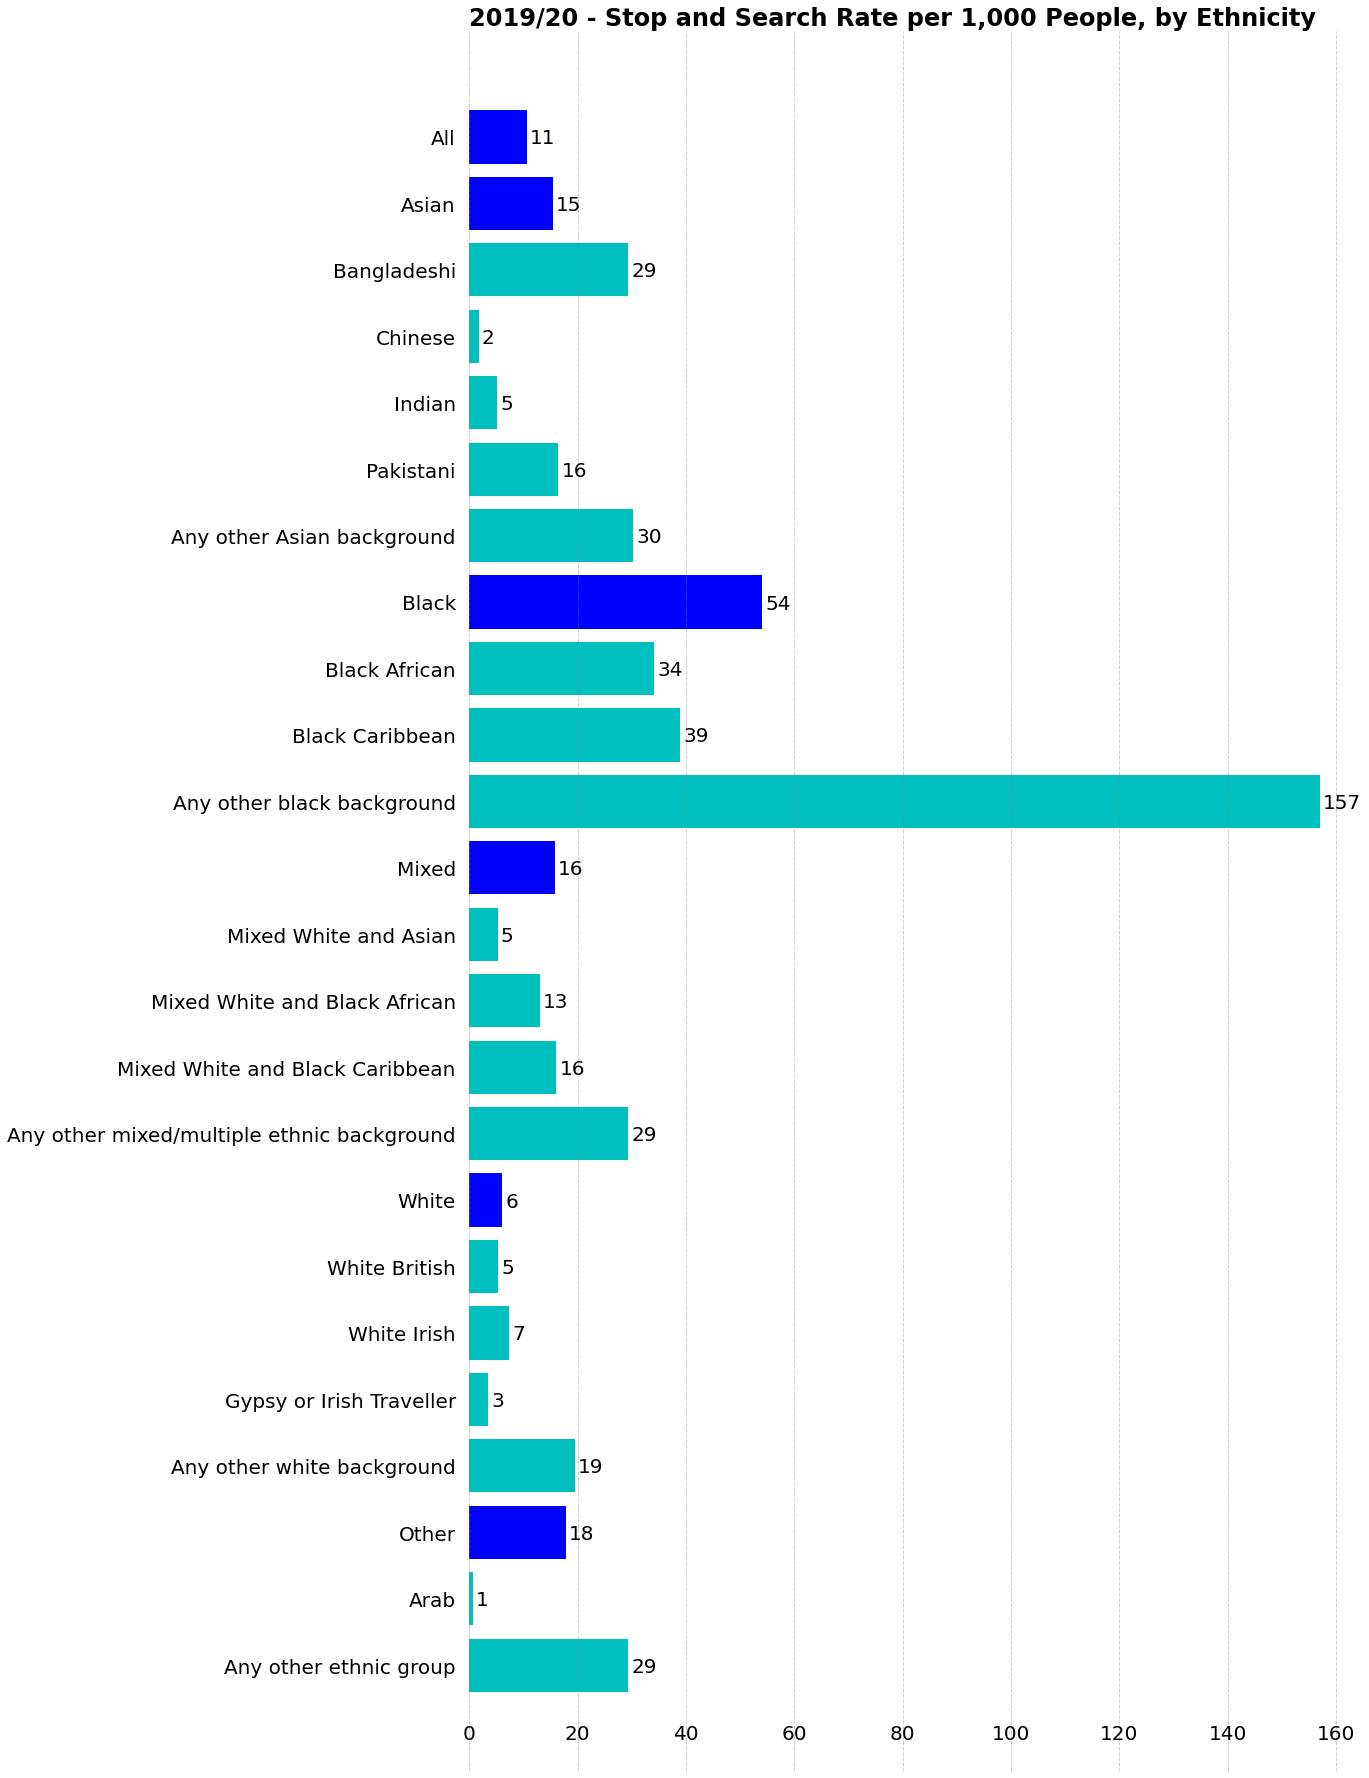

In [15]:
# Figure Size
fig, ax = plt.subplots(figsize=(16, 32))

# set the colour of major ethnic groups to blue and minor ethnic groups to cyan
colours = ['b', 'b', 'c', 'c', 'c', 'c', 'c', 'b', 'c', 'c', 'c', 'b', 
           'c', 'c', 'c', 'c', 'b', 'c', 'c', 'c', 'c', 'b', 'c', 'c']

# Horizontal Bar Plot
ax.barh(stop_n_search_2020['Ethnicity'], stop_n_search_2020['Rate per 1,000 population by ethnicity'], color=colours)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=-50)
ax.yaxis.set_tick_params(pad=10)

#  change appearance of tick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Add x, y gridlines
ax.grid(b=True, axis='x', color='grey', linestyle='-.', linewidth=0.5, alpha=0.8)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.6, i.get_y()+0.5, int(round(i.get_width(), 0)), fontsize=20)

# Add Plot Title
ax.set_title('2019/20 - Stop and Search Rate per 1,000 People, by Ethnicity', loc='left', fontsize= 24, weight=600)

# Show Plot
plt.show()

The bar chart above shows that:

* there were 6 stop and searches for every 1,000 `White` people, compared with 54 for every 1,000 `Black` people


* the 3 black minor ethnic groups had the highest rates of stop and search out of all 18 individual minor ethnic groups (refer to bars with cyan colour)


* the `Any other black background` minor ethic group had the highest rate overall with 157 stop and searches per 1,000 people – this minor ethnic group includes people who did not identify as `Black African` or `Black Caribbean`.

## 4. Historical Stop and Search Rates by Ethnicity

In [16]:
# boolean mask that only covers the years 2009/10 to 2018/19
bool_mask_2009_2019 = (
                         (stop_n_search['Time'] != '2019/20') 
                       & (stop_n_search['Time'] != '2006/07') 
                       & (stop_n_search['Time'] != '2007/08') 
                       & (stop_n_search['Time'] != '2008/09')
                      )
# do not included cases where ethnicity was unreported
bool_mask_ethnicity = (
                         (stop_n_search['Ethnicity'] != 'Unreported') 
                      )

# include stops for all legislation types and all police force areas excluding greater manchester
stop_n_search_2009_2019 = (stop_n_search[(bool_mask_2009_2019) 
                                    & (bool_mask_incl_btp_excl_manch) 
                                    & (bool_mask_leg_type) 
                                    & (bool_mask_ethnicity)]
                      .copy()
                     )

major_ethnic_groups = (
                         (stop_n_search['Ethnicity'] == 'All')
                       | (stop_n_search['Ethnicity'] == 'Asian')
                       | (stop_n_search['Ethnicity'] == 'Black')
                       | (stop_n_search['Ethnicity'] == 'Mixed')
                       | (stop_n_search['Ethnicity'] == 'White')
                       | (stop_n_search['Ethnicity'] == 'Other inc Chinese')
                      )

stop_n_search_2009_2019_race = stop_n_search_2009_2019[major_ethnic_groups][['Time', 'Ethnicity', 'Number of stop and searches', 'Rate per 1,000 population by ethnicity']].copy()

In [17]:
stop_n_search_2009_2019_race.head()

,Time,Ethnicity,Number of stop and searches,"Rate per 1,000 population by ethnicity"
75,2009/10,All,1348552.0,25.26
76,2010/11,All,1241779.0,23.26
77,2011/12,All,1130568.0,21.17
78,2012/13,All,976320.0,18.29
79,2013/14,All,869488.0,16.28


In [18]:
stop_n_search_2009_2019_race.tail()

,Time,Ethnicity,Number of stop and searches,"Rate per 1,000 population by ethnicity"
14359,2014/15,White,365140.0,7.94
14360,2015/16,White,229279.0,4.99
14361,2016/17,White,167701.0,3.65
14362,2017/18,White,145877.0,3.17
14363,2018/19,White,186216.0,4.05


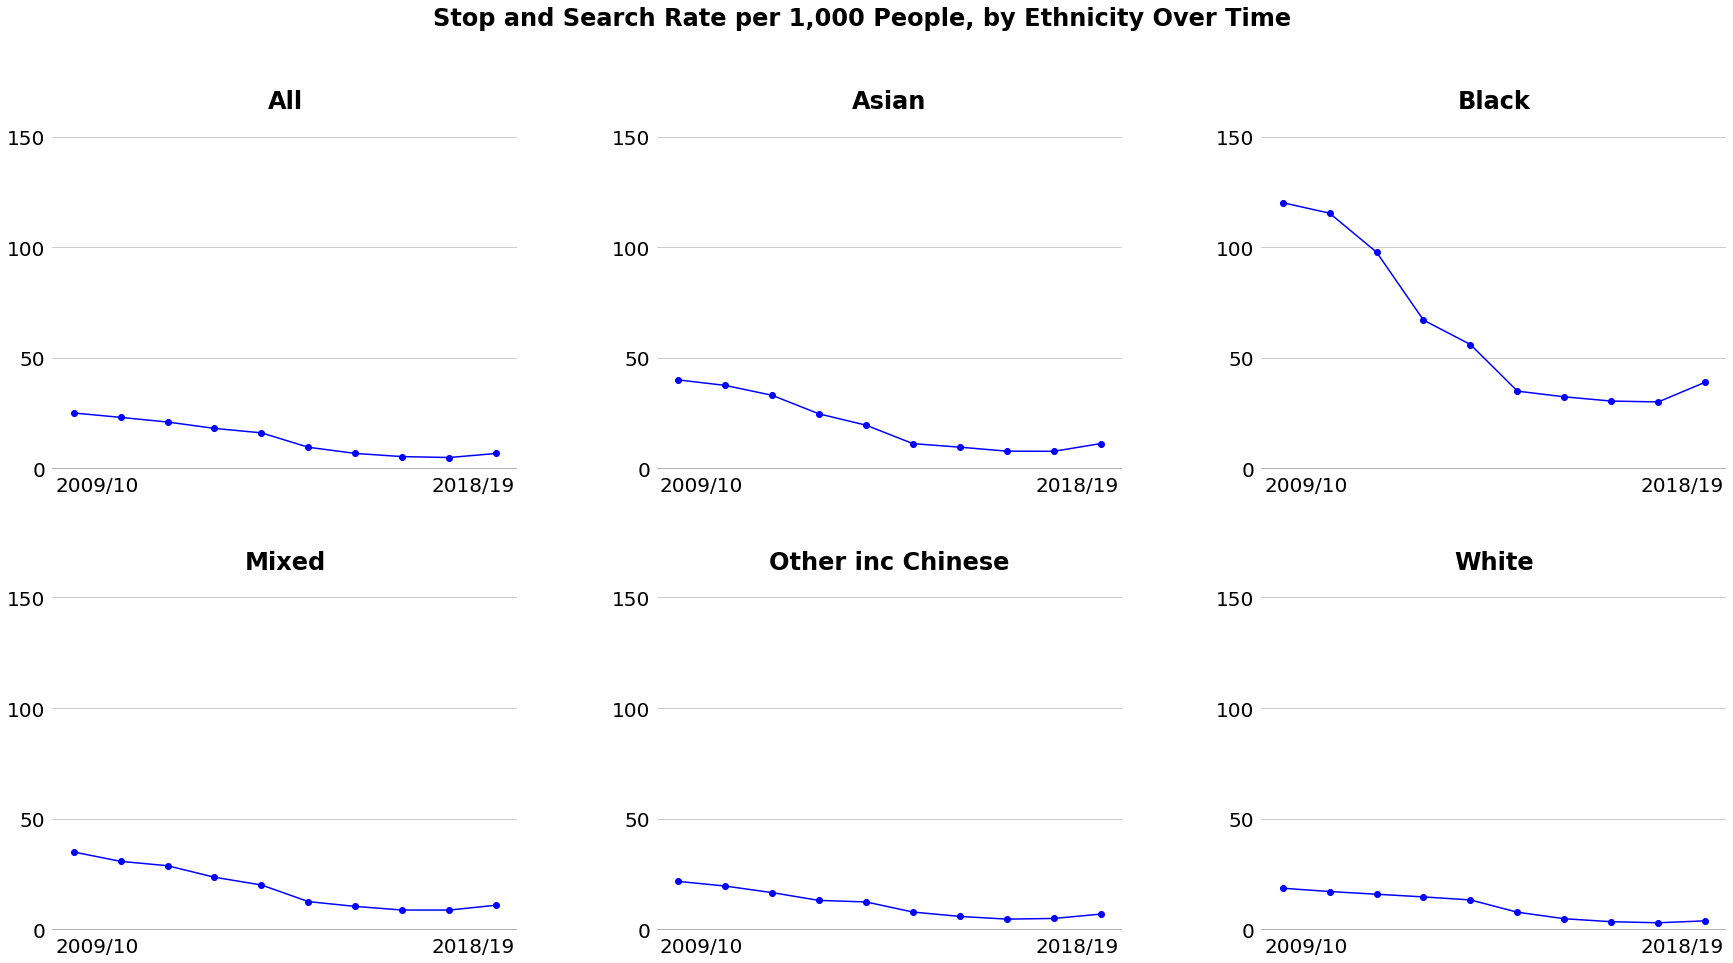

In [19]:
fig = plt.figure(figsize=(30,15))

# adjust spacing between all the subplots
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# add title to figure
fig.suptitle('Stop and Search Rate per 1,000 People, by Ethnicity Over Time', fontsize= 24, weight=600)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    race = stop_n_search_2009_2019_race['Ethnicity'].unique()[i-1]
    
    # set x and y values
    x = stop_n_search_2009_2019_race[stop_n_search_2009_2019_race['Ethnicity'] == race]['Time']
    y = stop_n_search_2009_2019_race[stop_n_search_2009_2019_race['Ethnicity'] == race]['Rate per 1,000 population by ethnicity']
    
    # plot line chart
    ax.plot(x, y, 'o-', color='b')
    
    # set y-axis limit
    ax.set_ylim((0,160))
    
    # Add Plot Title
    ax.set_title(race, fontsize=24, weight=600)
    
    # Remove axes splines
    for s in ['top', 'right', 'bottom', 'left']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # change appearance of tick labels
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    # Add x, y gridlines
    ax.grid(b=True, axis='y', color='grey', linewidth=0.5, alpha=0.8)
    
    # set x, y ticks
    ax.set_xticks(np.arange(0.5, 9, 8))
    ax.set_yticks(np.arange(0, 151, 50))
    
    # set x-tick labels
    ax.set_xticklabels(['2009/10', '2018/19'])
    
    # set horizontal line at y=0
    ax.axhline(y=0, xmin=0, xmax=1, color='grey', linestyle='-', alpha=0.8)

# Show Plot
plt.show()

In [20]:
stop_n_search_2009_2019_race.pivot(index='Ethnicity', columns='Time', values='Rate per 1,000 population by ethnicity')

Time,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19
Ethnicity,,,,,,,,,,
All,25.26,23.26,21.17,18.29,16.28,9.77,6.99,5.55,5.15,6.98
Asian,40.18,37.70,33.24,24.85,19.75,11.41,9.81,8.02,7.95,11.45
Black,120.17,115.42,97.84,67.15,56.14,35.11,32.53,30.62,30.24,39.16
Mixed,35.12,30.89,28.92,23.72,20.22,12.72,10.55,8.92,8.91,11.10
Other inc Chinese,21.85,19.75,16.79,13.26,12.58,8.01,6.04,4.82,5.12,7.09
White,18.77,17.27,16.06,14.84,13.48,7.94,4.99,3.65,3.17,4.05


The data does not include the financial year to 2019/20. This is because different ethnic group categories were used, meaning this data is not comparable with previous years.

The table and graphs above show that between April 2009 and March 2019:

* the national rate went down from 25 to 7 per 1,000 people


* the rate for `White` people was lower than the national rate in every year


* the rates for the `Asian`, `Black`, and `Mixed` ethnic groups were higher than the national rate in every year

It should be noted that the national stop and search rate went up for the first time between financial years 2017/18 and 2018/19 where the rate increased from 5 to 7 stop and searches per 1,000 people.

## 5. Stop and Search Rates in Financial Year 2019/20 by Ethnicity and Area

In [21]:
# return all the unique police force areas in england and wales
stop_n_search['Geography'].unique()

array(['All - excluding BTP',
       'All - excluding BTP and Greater Manchester',
       'All - including BTP',
       'All - including BTP and excluding Greater Manchester',
       'Avon & Somerset', 'Bedfordshire', 'British Transport Police',
       'Cambridgeshire', 'Cheshire', 'Cleveland', 'Cumbria', 'Derbyshire',
       'Devon & Cornwall', 'Dorset', 'Durham', 'Dyfed-Powys', 'Essex',
       'Gloucestershire', 'Greater Manchester', 'Gwent', 'Hampshire',
       'Hertfordshire', 'Humberside', 'Kent', 'Lancashire',
       'Leicestershire', 'Lincolnshire', 'London, City of', 'Merseyside',
       'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
       'West Midlands', 'West Yorkshire', 'Wiltshire'], dtype=object)

In [22]:
# we do not want to include the greater manchester police data as it is not complete and will not provide a fair comparison
# use the np.where() method to locate the index of 'Greater Manchester'
np.where(stop_n_search['Geography'].unique() == 'Greater Manchester')[0][0]

18

In [23]:
# filter dataframe to financial year 2019/20
bool_mask_2019_2020 = stop_n_search['Time'] == '2019/20'

# filter dataframe to all seperate police force area, for example: durham, kent, lancashire, etc.
bool_mask_police_areas = ((stop_n_search['Geography'] != stop_n_search['Geography'].unique()[0]) 
                        & (stop_n_search['Geography'] != stop_n_search['Geography'].unique()[1]) 
                        & (stop_n_search['Geography'] != stop_n_search['Geography'].unique()[2]) 
                        & (stop_n_search['Geography'] != stop_n_search['Geography'].unique()[3])
                        & (stop_n_search['Geography'] != stop_n_search['Geography'].unique()[18])
                         )
# include stops for all legislation types
bool_mask_leg_type = stop_n_search['Legislation_type'] == 'All'

# dont include cases where ethnicity was unreported
bool_mask_ethnicity = stop_n_search['Ethnicity'] != 'Unreported'

#  create a new dataframe with all the relevant boolean masks
stop_n_search_2020_all_police_areas = (stop_n_search[(bool_mask_2019_2020) 
                                        & (bool_mask_police_areas) 
                                        & (bool_mask_leg_type) 
                                        & (bool_mask_ethnicity)]
                                        .copy()
                                      )

major_ethnic_groups = (
                         (stop_n_search['Ethnicity'] == 'All')
                       | (stop_n_search['Ethnicity'] == 'Asian')
                       | (stop_n_search['Ethnicity'] == 'Black')
                       | (stop_n_search['Ethnicity'] == 'Mixed')
                       | (stop_n_search['Ethnicity'] == 'White')
                       | (stop_n_search['Ethnicity'] == 'Other')
                      )

stop_n_search_2020_race_area = stop_n_search_2020_all_police_areas[major_ethnic_groups][['Geography', 'Ethnicity', 'Rate per 1,000 population by ethnicity']].copy()

In [24]:
stop_n_search_2020_race_area

,Geography,Ethnicity,"Rate per 1,000 population by ethnicity"
99,Avon & Somerset,All,5.21
113,Bedfordshire,All,5.44
124,British Transport Police,All,NaN
138,Cambridgeshire,All,3.01
152,Cheshire,All,3.91
...,...,...,...
14921,Warwickshire,White,2.39
14935,West Mercia,White,3.00
14949,West Midlands,White,5.01
14963,West Yorkshire,White,4.14


In [25]:
# split the search rates for london (metropolitan police) and the remainder of england and wales
london_rates = []
eng_wales_rate = []

for race in stop_n_search_2020_race_area['Ethnicity'].unique():
    filtered_df = stop_n_search_2020_race_area[stop_n_search_2020_race_area['Ethnicity'] == race]
    
    london_rate = filtered_df[filtered_df['Geography'] == 'Metropolitan Police']
    london_rates.append(london_rate.iloc[0, 2])
    
    #the remaining rate is the mean of all the police areas except metropolitan police
    remaining_rate = (filtered_df
                      [filtered_df['Geography'] != 'Metropolitan Police']['Rate per 1,000 population by ethnicity']
                      .mean()
                     )
    eng_wales_rate.append(remaining_rate)

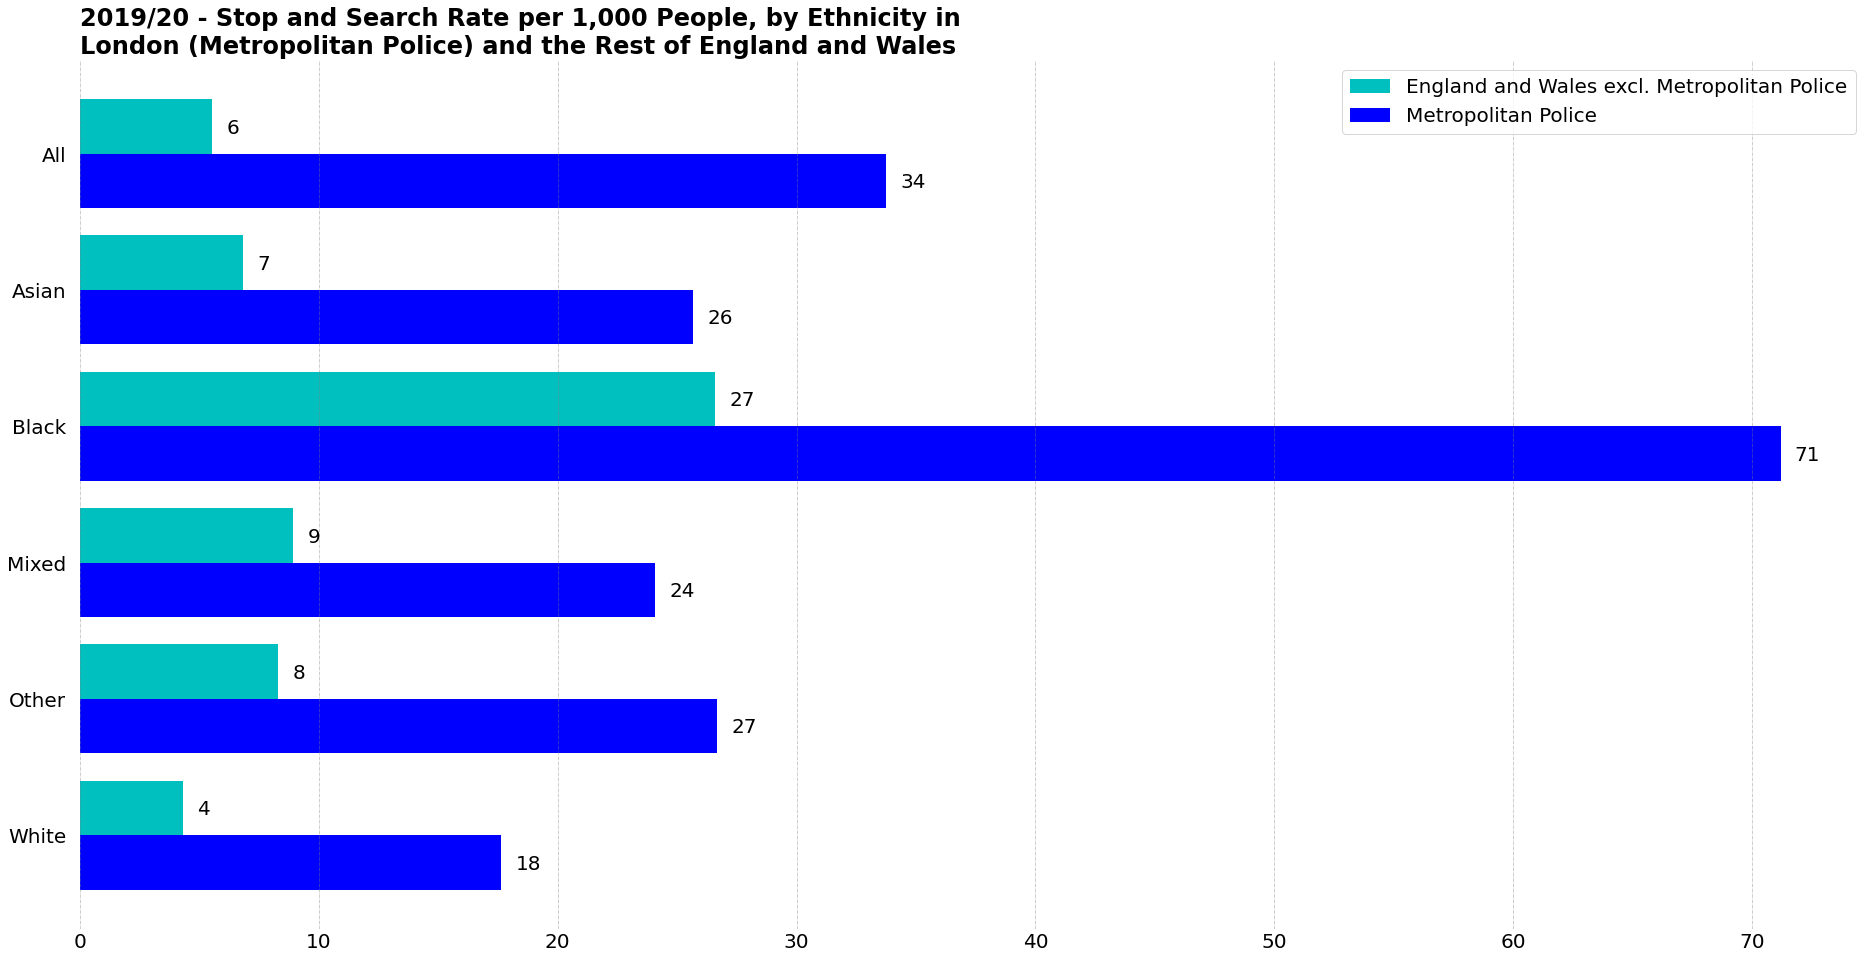

In [26]:
# labels for axis
labels = stop_n_search_2020_race_area['Ethnicity'].unique()

# set label locations
x = np.arange(len(labels))

# set the width of the bars
width = 0.40  

# Figure Size
fig, ax = plt.subplots(figsize=(32, 16))

# plot 2 sets of horizontal bars
ax.barh(x - width/2, eng_wales_rate, width, label='England and Wales excl. Metropolitan Police', color='c')
ax.barh(x + width/2, london_rates, width, label='Metropolitan Police', color='b')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')    
    
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=10)

#  change appearance of tick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Add x, y gridlines
ax.grid(b=True, axis='x', color='grey', linestyle='-.', linewidth=0.5, alpha=0.8)

# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('''2019/20 - Stop and Search Rate per 1,000 People, by Ethnicity in
London (Metropolitan Police) and the Rest of England and Wales''', loc='left', fontsize= 24, weight=600)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend(fontsize=20)

# add rounded numbers at the end of each bar
for i in ax.patches:
    ax.text(i.get_width()+0.6, i.get_y()+0.25, int(round(i.get_width(), 0)), fontsize=20)

# Show Plot
plt.show()

The bar plot above shows that:

* there were 34 stop and searches for every 1,000 people in London, compared with 6 per 1,000 people in the rest of England and Wales (a person is almost 6 times more likely to be stopped and searched in London)


* there were 71 stop and searches for every 1,000 `Black` people in London, compared with 27 per 1,000 `Black` people in the rest of England and Wales

## 6. Stop and Search in Financial Year 2019/20 by Ethnicity and Legislation Type

In [27]:
# filter data frame with cases only from 2019/20
bool_mask_2019_2020 = stop_n_search['Time'] == '2019/20'

# cannot include greater manchester police because their data is not complete
bool_mask_incl_btp_excl_manch = stop_n_search['Geography'] == 'All - including BTP and excluding Greater Manchester'

stop_n_search_2020 = (stop_n_search[(bool_mask_2019_2020) & (bool_mask_incl_btp_excl_manch)].copy())

major_ethnic_groups = (
                         (stop_n_search['Ethnicity'] == 'Asian')
                       | (stop_n_search['Ethnicity'] == 'Black')
                       | (stop_n_search['Ethnicity'] == 'Mixed')
                       | (stop_n_search['Ethnicity'] == 'White')
                       | (stop_n_search['Ethnicity'] == 'Other')
                       | (stop_n_search['Ethnicity'] == 'Unreported')
                      )

stop_n_search_2020_leg = stop_n_search_2020[major_ethnic_groups][['Ethnicity', 'Number of stop and searches', 'Legislation_type']]
stop_n_search_2020_leg

,Ethnicity,Number of stop and searches,Legislation_type
4162,Asian,60575.0,All
5527,Black,96905.0,All
8938,Mixed,18369.0,All
11556,Other,9552.0,All
13052,Unreported,97775.0,All
14364,White,280661.0,All
16311,Asian,1617.0,Section 60
16312,Black,4480.0,Section 60
16313,Mixed,591.0,Section 60
16314,Other,350.0,Section 60


This data covers stop and search of individuals under the following leglislation types:

* section 1 – the police can stop and search someone they think is carrying items like stolen property or drugs


* section 44/47a – the police can stop and search someone if they suspect an act of terrorism is about to take place


* section 60 – the police can stop and search someone to prevent violence involving weapons

No stop and searches were conducted under section 44/47a, so lets remove this from the dataframe above.

In [28]:
stop_n_search_2020_leg = stop_n_search_2020_leg[stop_n_search_2020_leg['Legislation_type'] != 'Section 44/47a']
stop_n_search_2020_leg

,Ethnicity,Number of stop and searches,Legislation_type
4162,Asian,60575.0,All
5527,Black,96905.0,All
8938,Mixed,18369.0,All
11556,Other,9552.0,All
13052,Unreported,97775.0,All
14364,White,280661.0,All
16311,Asian,1617.0,Section 60
16312,Black,4480.0,Section 60
16313,Mixed,591.0,Section 60
16314,Other,350.0,Section 60


Lets group this dataframe by legislation type and calculate the sums and corresponding proportions.

In [29]:
grouped_by_leg = (stop_n_search_2020_leg
              .groupby(['Legislation_type'])
              .agg({'Number of stop and searches': 'sum'})
             )

In [30]:
grouped_by_leg['% of stop and searches'] = (grouped_by_leg['Number of stop and searches'] * 100 
                                            / grouped_by_leg.loc['All', 'Number of stop and searches']
                                           )
grouped_by_leg

,Number of stop and searches,% of stop and searches
Legislation_type,,
All,563837.0,100.000000
Section 1,545910.0,96.820535
Section 60,17927.0,3.179465


The data shows that, between April 2019 and March 2020, almost all stop and searches in England and Wales were conducted under `Section 1` (97%).

Now lets group the data under legislation type and then ethnicity and calculate the sums.

In [31]:
grouped_by_leg_ethnicity = (stop_n_search_2020_leg
              .groupby(['Legislation_type', 'Ethnicity'])
              .agg({'Number of stop and searches': 'sum'})
             )

In [32]:
grouped_by_leg_ethnicity

Number of stop and searches
Legislation_type Ethnicity                              
All              Asian                           60575.0
                 Black                           96905.0
                 Mixed                           18369.0
                 Other                            9552.0
                 Unreported                      97775.0
                 White                          280661.0
Section 1        Asian                           58958.0
                 Black                           92425.0
                 Mixed                           17778.0
                 Other                            9202.0
                 Unreported                      93282.0
                 White                          274265.0
Section 60       Asian                            1617.0
                 Black                            4480.0
                 Mixed                             591.0
                 Other                             350.0
                 Unreported                       4493.0
                 White                            6396.0

Lets convert the sums into proportions to get a better understanding of the data.

In [33]:
percents_leg_ethnicity = grouped_by_leg_ethnicity.groupby(level=0).apply(lambda x: round((100 * x / x.sum()), 1))

In [34]:
percents_leg_ethnicity.rename(columns={'Number of stop and searches':'% of stop and searches'}, inplace=True)
percents_leg_ethnicity

% of stop and searches
Legislation_type Ethnicity                         
All              Asian                         10.7
                 Black                         17.2
                 Mixed                          3.3
                 Other                          1.7
                 Unreported                    17.3
                 White                         49.8
Section 1        Asian                         10.8
                 Black                         16.9
                 Mixed                          3.3
                 Other                          1.7
                 Unreported                    17.1
                 White                         50.2
Section 60       Asian                          9.0
                 Black                         25.0
                 Mixed                          3.3
                 Other                          2.0
                 Unreported                    25.1
                 White                         35.7

In [35]:
# this cell is to show that the index of our data frame has multiple levels
percents_leg_ethnicity.index

MultiIndex([(       'All',      'Asian'),
            (       'All',      'Black'),
            (       'All',      'Mixed'),
            (       'All',      'Other'),
            (       'All', 'Unreported'),
            (       'All',      'White'),
            ( 'Section 1',      'Asian'),
            ( 'Section 1',      'Black'),
            ( 'Section 1',      'Mixed'),
            ( 'Section 1',      'Other'),
            ( 'Section 1', 'Unreported'),
            ( 'Section 1',      'White'),
            ('Section 60',      'Asian'),
            ('Section 60',      'Black'),
            ('Section 60',      'Mixed'),
            ('Section 60',      'Other'),
            ('Section 60', 'Unreported'),
            ('Section 60',      'White')],
           names=['Legislation_type', 'Ethnicity'])

In [36]:
# attach proportions of each ethnicity to a dictionary with the keys as legislation types
# the ordering of the ethnicities will be uniform for each key and will be in the form of a list

results = {}
    
for l_type in stop_n_search_2020_leg['Legislation_type'].unique():
        # drop the multi level index so that we can match the legislation type
        filtered_df = percents_leg_ethnicity[percents_leg_ethnicity.index.droplevel(1) == l_type]
        list_of_percentages = []
        for row in filtered_df.iterrows():
            list_of_percentages.append(row[1][0])
        results[l_type] = list_of_percentages

results

{'All': [10.7, 17.2, 3.3, 1.7, 17.3, 49.8],
 'Section 60': [9.0, 25.0, 3.3, 2.0, 25.1, 35.7],
 'Section 1': [10.8, 16.9, 3.3, 1.7, 17.1, 50.2]}

In [37]:
#include category names as a list
category_names = stop_n_search_2020_leg['Ethnicity'].unique()
category_names

array(['Asian', 'Black', 'Mixed', 'Other', 'Unreported', 'White'],
      dtype=object)

Lets define a function where a dictionary of results and a list of category names is converted into a stacked bar chart.

In [38]:
def stacked_bar_chart(results, category_names):
 
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Set1')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(32, 16))
    ax.invert_yaxis()
    
    # Remove axes splines
    for s in ['top', 'right', 'bottom', 'left']:
        ax.spines[s].set_visible(False)

    # plot the discrete bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

    # set x, y ticks
    ax.set_xticks(np.arange(0, 101, 10))
    
    # set x-tick labels
    ax.set_xticklabels(np.arange(0, 101, 10))
    
    # Add x, y gridlines
    ax.grid(b=True, axis='x', color='grey', linestyle='-.', linewidth=0.5, alpha=0.8)
    
    #  change appearance of tick labels
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    
    # include the legend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, -0.1),
              loc='upper center', fontsize=25)
    
    # Add Plot Title
    ax.set_title('2019/20 - Percentage of Stops Under Each Legislation, by Ethnicity', loc='center', fontsize=30, weight=600)

    # annotate each discrete bar
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width > 0:
            ax.annotate(f'{width:0.1f}', xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=20)

    return fig, ax

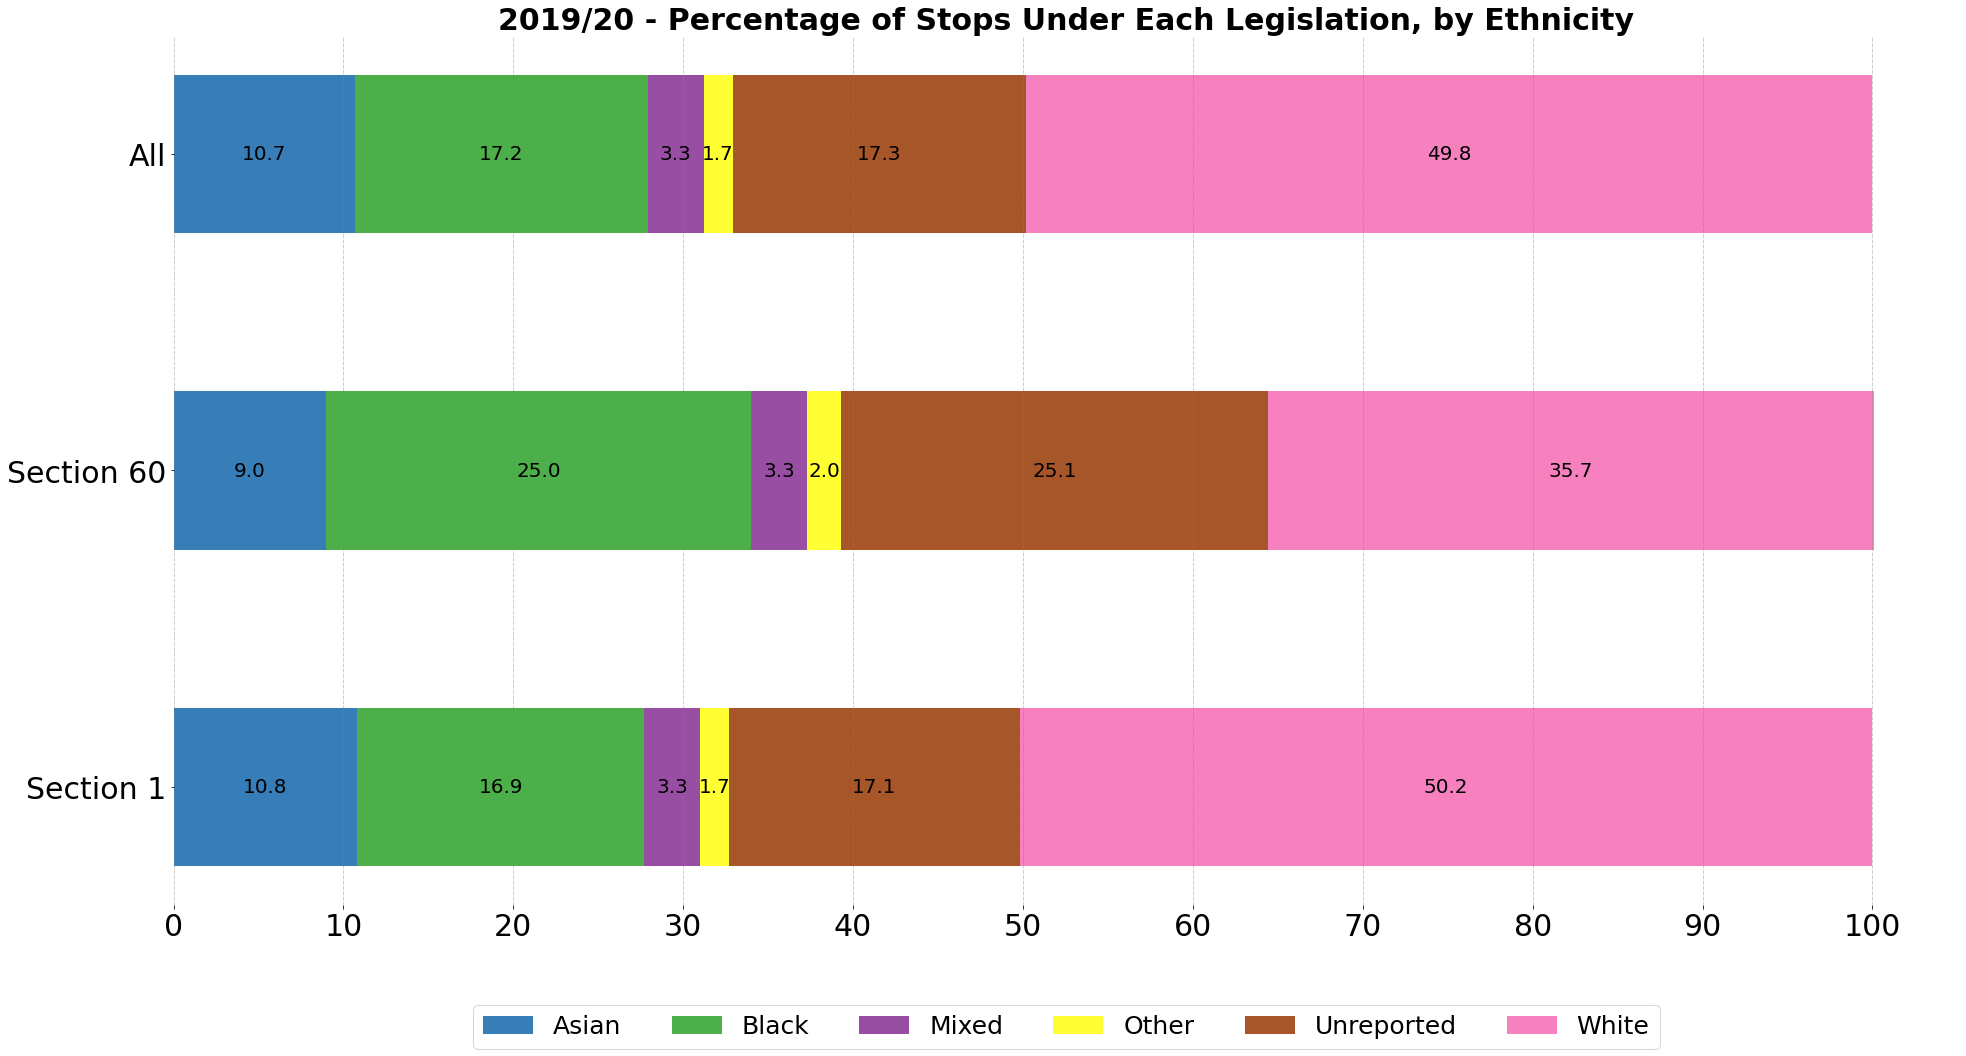

In [39]:
stacked_bar_chart(results, category_names)
plt.show()

`White` people had the highest proportion out of all ethnic groups for each legislation type. This makes sense because `White` people make up the majority of the population in England and Wales.

More than 50% of section 1 stop and searches involved `White` people.

## 7. Conclusions

* Between April 2019 and March 2020, there were 563,837 stop and searches in England and Wales.


* There were 6 stop and searches for every 1,000 `White` people, compared with 54 for every 1,000 `Black` people in the year ending March 2020.


* There were 7 stop and searches for every 1,000 people in the year ending March 2019, down from 25 per 1,000 people in the year ending March 2010.


* Stop and search rates have fallen for every major ethnic group since 2009.


* A person is more likely to be stopped and searched in London than any other police force area.


* 97% of stop and searches were conducted under the `Section 1` legislation type.